In [1]:

#import basic Libraries
import pandas as pd
import numpy as np
#import numpy_indexed as npi
from tqdm import tqdm

#Visualizaiton imports
import seaborn as sns
import matplotlib.pyplot as plt

#combine sparse matrices
import scipy.sparse as sps

#Importing Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,f1_score 
from sklearn.decomposition import PCA
from sklearn import tree,model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from keras.models import Sequential
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop
import tensorflow as tf
import keras
# Import the backend
from keras import backend as K
%matplotlib inline

Using TensorFlow backend.


In [2]:

#import of all files from the data folder.
aisles = pd.read_csv('C:/Users/ankush/Downloads/aisles.csv')
departments = pd.read_csv('C:/Users/ankush/Downloads/departments.csv')
order_products__prior = pd.read_csv('C:/Users/ankush/Downloads/order_products__prior.csv')
order_products__train = pd.read_csv('C:/Users/ankush/Downloads/order_products__train.csv')
orders = pd.read_csv('C:/Users/ankush/Downloads/orders.csv')
products = pd.read_csv('C:/Users/ankush/Downloads/products.csv')

In [19]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [20]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [21]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [3]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [4]:
orders=orders.dropna(0)
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [23]:
order_products__train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [5]:
opt = order_products__train.merge(products,how='left', on='product_id')
opt = opt.merge(orders,how='left', on='order_id')
opt = opt.merge(aisles,how='left', on='aisle_id')
opt = opt.merge(departments,how='left', on='department_id')
opt.head(500)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood,canned goods
5,1,13176,6,0,Bag of Organic Bananas,24,4,112108,train,4,4,10,9.0,fresh fruits,produce
6,1,47209,7,0,Organic Hass Avocado,24,4,112108,train,4,4,10,9.0,fresh fruits,produce
7,1,22035,8,1,Organic Whole String Cheese,21,16,112108,train,4,4,10,9.0,packaged cheese,dairy eggs
8,36,39612,1,0,Grated Pecorino Romano Cheese,2,16,79431,train,23,6,18,30.0,specialty cheeses,dairy eggs
9,36,19660,2,1,Spring Water,115,7,79431,train,23,6,18,30.0,water seltzer sparkling water,beverages


In [28]:
opt.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
aisle                     0
department                0
dtype: int64

In [7]:
opt[opt.reordered==0].shape

(555793, 15)

In [7]:
X=opt.drop(['product_name','eval_set','aisle','department','reordered'],axis=1)
Y=opt['reordered']
X = StandardScaler().fit_transform(X)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [80]:
X_train.shape

(969231, 10)

# PCA

In [9]:
X_pca = PCA(n_components=5)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.14076004 0.10773474 0.10237999 0.10034129 0.10015277]


In [11]:
lr = LogisticRegression(C=0.02)

In [12]:
lr.fit(X_train_pca,y_train)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(lr, X_train_pca, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(lr, X_test_pca, y_test, cv=5))

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Training data accuracy:  [0.62909408 0.62596274 0.62846472 0.62941525 0.6278831 ]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Testing data accuracy:  [0.62647151 0.62848923 0.6288022  0.62752627 0.63067997]


In [42]:
y_pred_lr = lr.predict(X_train_pca)

# Confusion Matrix

In [44]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_lr))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_lr))

[[112718 276250]
 [ 81116 499147]]
Accuracy Score for Random Forest : 0.6312891354073488


# AUC

In [43]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, y_pred_lr))

AUC Score for Random Forest : 0.5749977753102224


# Classification Report

In [41]:

from sklearn.metrics import classification_report
print("Classification Report for Random Forest:",classification_report(y_train, y_pred_lr))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.56      0.37      0.45    388968
           1       0.66      0.80      0.72    580263

   micro avg       0.63      0.63      0.63    969231
   macro avg       0.61      0.59      0.58    969231
weighted avg       0.62      0.63      0.61    969231



# 2.KNN Classification

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [43]:
params = {'n_neighbors':[5],
          'leaf_size':[1,2,3,5]
                  }
#Making models with hyper parameters sets
grid_class_knn = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class_knn.fit(X_train_pca,y_train)
#The best hyper parameters set

results = grid_class_knn.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_knn.best_params_)
print(grid_class_knn.best_score_)
final_model = grid_class_knn.best_estimator_
print(final_model)


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 3, 'n_neighbors': 5}, {'leaf_size': 5, 'n_neighbors': 5}]
[0.57054717 0.57054717 0.57054717 0.57054717]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.72350967 0.72350967 0.72350967 0.72350967]
Best Hyper Parameters:
 {'leaf_size': 1, 'n_neighbors': 5}
0.5705471657427383
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [28]:

#Fitting the model with the parameters and train data
knn_model = KNeighborsClassifier(leaf_size=1,n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_train_pca)

In [59]:
y_pred_knn.shape

(969231,)

In [29]:
from sklearn.model_selection import cross_val_score
print("Training data accuracy for knn: ",cross_val_score(knn_model, X_train_pca, y_train, cv=10))
print("Testing data accuracy for knn: ",cross_val_score(knn_model, X_test_pca, y_test, cv=10))

Training data accuracy for knn:  [0.58909042 0.58860551 0.58934836 0.58908618 0.59056158 0.59064412
 0.59096396 0.58943698 0.58689462 0.58962877]
Testing data accuracy for knn:  [0.58846895 0.58804978 0.58530538 0.58718313 0.58658129 0.58767875
 0.5895084  0.58998989 0.58861765 0.59220473]


# AUC

In [46]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, y_pred_knn))

AUC Score for Random Forest : 0.7042915632004009


# Confusion Matrix

In [47]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_knn))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_knn))

[[225505 163463]
 [ 99323 480940]]
Accuracy Score for Random Forest : 0.7288716518559559


# Classification Report

In [48]:
from sklearn.metrics import classification_report
print("Classification Report for Random Forest:",classification_report(y_train, y_pred_knn))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.69      0.58      0.63    388968
           1       0.75      0.83      0.79    580263

   micro avg       0.73      0.73      0.73    969231
   macro avg       0.72      0.70      0.71    969231
weighted avg       0.73      0.73      0.72    969231



# Random Forest Classifier

In [19]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train_pca, y_train)
rfc_pred = rfc.predict(X_train_pca)

In [20]:
dt_grid={'max_depth':[3,4,5],'max_features': [5]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train_pca, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 5}, {'max_depth': 4, 'max_features': 5}, {'max_depth': 5, 'max_features': 5}]
[0.62952691 0.63083414 0.63213517]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.62974152 0.63133948 0.63251898]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 5}
0.6321351669519444
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [21]:
rfc = ensemble.RandomForestClassifier(max_depth=5,max_features= 5)
rfc.fit(X_train_pca, y_train)
rfc_pred = rfc.predict(X_train_pca)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(rfc, X_train_pca, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(rfc, X_test, y_test, cv=5))

Training data accuracy:  [0.63246787 0.63030122 0.63348414 0.63232995 0.63211329]
Testing data accuracy:  [0.66179975 0.66242161 0.66592438 0.66036328 0.66667068]


# AUC

In [23]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, rfc_pred))

AUC Score for Random Forest : 0.5790349655943385


# Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, rfc_pred))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, rfc_pred))

[[120309 268659]
 [ 87755 492508]]
Accuracy Score for Random Forest : 0.6322713573957086


# Classification Report

In [26]:
from sklearn.metrics import classification_report
print("Classification Report for Random Forest:",classification_report(y_train, rfc_pred))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.58      0.31      0.40    388968
           1       0.65      0.85      0.73    580263

   micro avg       0.63      0.63      0.63    969231
   macro avg       0.61      0.58      0.57    969231
weighted avg       0.62      0.63      0.60    969231



# Decision Tree

In [66]:
decision_tree = tree.DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train_pca, y_train)
y_pred_dt = decision_tree.predict(X_train_pca)

In [67]:

dt_grid={'max_depth':[50],'max_features': [5]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_pca, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 5}]
[0.60001383]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.99962176]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 5}
0.6000138253935337
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [68]:

#Fitting the best parmaters after gridsearchcv to the decision tree
decision_tree = tree.DecisionTreeClassifier(max_depth=50,max_features=5)
decision_tree.fit(X_train_pca, y_train)
y_pred_dt = decision_tree.predict(X_train_pca)

In [69]:

print("Training data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_train_pca, y_train, cv=10))
print("Testing data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_test_pca, y_test, cv=10))

Training data accuracy for Decision Tree:  [0.59990302 0.59899509 0.59903636 0.59944492 0.60186953 0.5997854
 0.6027981  0.60035286 0.60286622 0.59834712]
Testing data accuracy for Decision Tree:  [0.59354839 0.59534413 0.59247936 0.588772   0.59209418 0.59256584
 0.5869806  0.59518995 0.59112138 0.58982137]


In [71]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for Decision Tree :" ,roc_auc_score(y_train, y_pred_dt))

AUC Score for Decision Tree : 0.9988297008562766


In [74]:

print(confusion_matrix(y_train, y_pred_dt))
print('Accuracy Score for Decision Tree :',accuracy_score(y_train, y_pred_dt))

[[388256    712]
 [   296 579967]]
Accuracy Score for Decision Tree : 0.998960000247619


In [75]:
print("Classification Report for Decision Tree:",classification_report(y_train, y_pred_dt))

Classification Report for Decision Tree:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    388968
           1       1.00      1.00      1.00    580263

   micro avg       1.00      1.00      1.00    969231
   macro avg       1.00      1.00      1.00    969231
weighted avg       1.00      1.00      1.00    969231



# SVC

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_train_pca)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [76]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(svm,param_grid,refit = True)
grid_class_svm.fit(X_train_pca, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

NameError: name 'svm' is not defined

In [ ]:
svm=SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_train_pca)

In [ ]:

print("Training data accuracy for Random Forest: ",cross_val_score(grid_class_rfc, X_train_pca, y_train, cv=10))
print("Testing data accuracy for Random Forest: ",cross_val_score(grid_class_rfc, X_test_pca, y_test, cv=10))

In [ ]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, y_pred_rfc))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_bnb))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_rfc))

In [ ]:

print("Classification Report for Random Forest:",classification_report(y_train, y_pred_rfc))

# GradientBoostingClassifier


In [ ]:
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

In [ ]:

params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train_pca, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)

In [ ]:
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

In [ ]:
print("Training data accuracy for GBR: ",cross_val_score(gb, X_train_pca, y_train, cv=10))
print("Testing data accuracy for GBR: ",cross_val_score(gb, X_test_pca, y_test, cv=10))

In [ ]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for GBR :" ,roc_auc_score(y_train, y_pred_gbr))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_gbr))
print('Accuracy Score for GBR :',accuracy_score(y_train, y_pred_gbr))

In [ ]:

print("Classification Report for GBR:",classification_report(y_train, y_pred_gbr))

# SKB

In [30]:
#Using skb to get the best 5 features out of the total
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
skb = SelectKBest(f_classif,k=5)
skb.fit(X_train, y_train)
#skb.fit(X_train_sample, y_train_sample)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)

# Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(X_train_skb,y_train)
y_pred_lr = lr.predict(X_train_skb)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(lr, X_train_skb, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(lr, X_test_skb, y_test, cv=5))

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Training data accuracy:  [0.64893447 0.64718567 0.64742813 0.64782687 0.64805386]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Testing data accuracy:  [0.6456583  0.65019199 0.65066143 0.64774847 0.6482781 ]


# AUC

In [33]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for LR :" ,roc_auc_score(y_train, y_pred_lr))

AUC Score for LR : 0.5972670965121367


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_lr))
print('Accuracy Score for LR :',accuracy_score(y_train, y_pred_lr))

[[132584 256384]
 [ 84908 495355]]
Accuracy Score for LR : 0.647873417172996


In [35]:
from sklearn.metrics import classification_report
print("Classification Report for LR:",classification_report(y_train, y_pred_lr))

Classification Report for LR:               precision    recall  f1-score   support

           0       0.61      0.34      0.44    388968
           1       0.66      0.85      0.74    580263

   micro avg       0.65      0.65      0.65    969231
   macro avg       0.63      0.60      0.59    969231
weighted avg       0.64      0.65      0.62    969231



# KNN

In [56]:
#Fitting the model with the parameters and train data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_skb, y_train)
y_pred_knn = knn_model.predict(X_train_skb)

In [57]:

params = {'n_neighbors':[5],
          'leaf_size':[1,2,3,5]
                  }
#Making models with hyper parameters sets
grid_class_knn = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class_knn.fit(X_train_skb,y_train)
#The best hyper parameters set

results = grid_class_knn.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_knn.best_params_)
print(grid_class_knn.best_score_)
final_model = grid_class_knn.best_estimator_
print(final_model)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 3, 'n_neighbors': 5}, {'leaf_size': 5, 'n_neighbors': 5}]
[0.63439159 0.63460104 0.63437612 0.63429048]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.7425397  0.74252423 0.74252474 0.74233078]
Best Hyper Parameters:
 {'leaf_size': 2, 'n_neighbors': 5}
0.6346010393807049
KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [58]:

#Fitting the model with the best parameters we got above to improve the performance
knn_model = KNeighborsClassifier(leaf_size= 1,n_neighbors=5)
knn_model.fit(X_train_skb, y_train)
y_pred_knn = knn_model.predict(X_train_skb)

In [59]:
print("Training data accuracy for KNN: ",cross_val_score(knn_model, X_train_skb, y_train, cv=10))
print("Testing data accuracy for KNN: ",cross_val_score(knn_model, X_test_skb, y_test, cv=10))

Training data accuracy for KNN:  [0.6357249  0.6370352  0.63624077 0.63537035 0.63627828 0.63483384
 0.63819733 0.63732035 0.63763645 0.63613008]
Testing data accuracy for KNN:  [0.63088589 0.63241773 0.62890296 0.63020294 0.63410289 0.62855698
 0.63329963 0.63026626 0.6317348  0.63380519]


In [60]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for KNN :" ,roc_auc_score(y_train, y_pred_knn))

AUC Score for KNN : 0.7215467450149926


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_knn))
print('Accuracy Score for LR :',accuracy_score(y_train, y_pred_knn))

In [61]:

print("Classification Report for KNN:",classification_report(y_train, y_pred_knn))

Classification Report for KNN:               precision    recall  f1-score   support

           0       0.70      0.62      0.66    388968
           1       0.76      0.83      0.79    580263

   micro avg       0.74      0.74      0.74    969231
   macro avg       0.73      0.72      0.73    969231
weighted avg       0.74      0.74      0.74    969231



# Random Forest

In [36]:

#Fitting the model with the parameters and train data
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train_skb, y_train)
y_pred_rfc = rfc.predict(X_train_skb)

In [37]:

dt_grid={'max_depth':[3,4,5],'max_features': [5]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train_skb, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 5}, {'max_depth': 4, 'max_features': 5}, {'max_depth': 5, 'max_features': 5}]
[0.64420659 0.65376675 0.65869953]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.64432731 0.65384867 0.6588353 ]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 5}
0.6586995257064622
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [38]:

#Fitting the model with the best parameters we got above to improve the performance
rfc = ensemble.RandomForestClassifier(max_depth=3, max_features= 5,n_estimators= 100)
rfc.fit(X_train_skb, y_train)
y_pred_rfc = rfc.predict(X_train_skb)

In [40]:

print("Training data accuracy for Random Forest: ",cross_val_score(rfc, X_train_skb, y_train, cv=10))
print("Testing data accuracy for Random Forest: ",cross_val_score(rfc, X_test_skb, y_test, cv=10))

Training data accuracy for Random Forest:  [0.64327721 0.64592877 0.64400974 0.64358305 0.64249972 0.64403702
 0.64754496 0.64106559 0.64519923 0.64649925]
Testing data accuracy for Random Forest:  [0.64557053 0.64659717 0.64736753 0.64883603 0.64922121 0.64714238
 0.64709423 0.64379604 0.6445905  0.64846646]


In [42]:

print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, y_pred_rfc))

AUC Score for Random Forest : 0.6111819520156541


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_knn))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_knn))

[[230000 158968]
 [102308 477955]]
Accuracy Score for Random Forest : 0.7304295879929552


In [44]:
print("Classification Report for Random Forest:",classification_report(y_train, y_pred_rfc))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.58      0.44      0.50    388968
           1       0.68      0.78      0.73    580263

   micro avg       0.65      0.65      0.65    969231
   macro avg       0.63      0.61      0.61    969231
weighted avg       0.64      0.65      0.63    969231



# Decision Tree

In [45]:
#Fitting the model with the parameters and train data
decision_tree = tree.DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train_skb, y_train)
y_pred_dt = decision_tree.predict(X_train_skb)

In [47]:

dt_grid={'max_depth':[50],'max_features': [5]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_skb, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 5}]
[0.60235795]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.88816226]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 5}
0.6023579518195353
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [48]:

#Fitting the model with the best parameters we got above to improve the performance
decision_tree = tree.DecisionTreeClassifier(max_depth=50,max_features=5)
decision_tree.fit(X_train_skb, y_train)
y_pred_dt = decision_tree.predict(X_train_skb)

In [49]:

print("Training data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_train_skb, y_train, cv=5))
print("Testing data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_test_skb, y_test, cv=5))

Training data accuracy for Decision Tree:  [0.60249578 0.60119579 0.60184063 0.6020016  0.60185715]
Testing data accuracy for Decision Tree:  [0.59099882 0.59084945 0.59342538 0.59503834 0.59338927]


In [50]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for Decision Tree :" ,roc_auc_score(y_train, y_pred_dt))

AUC Score for Decision Tree : 0.8832534428502907


In [53]:
print(confusion_matrix(y_train, y_pred_dt))
print('Accuracy Score for Decision Tree :',accuracy_score(y_train, y_pred_dt))

[[348463  40505]
 [ 75062 505201]]
Accuracy Score for Decision Tree : 0.8807642347386743


# SVC

In [ ]:
#Fitting the model with the parameters and train data
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_skb, y_train)
y_pred_svm = svm.predict(X_train_skb)

In [ ]:

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(SVC(),param_grid,refit = True)
grid_class_svm.fit(X_train_skb, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [ ]:

print("Training data accuracy for SVC: ",cross_val_score(grid_class_svm, X_train_skb, y_train, cv=5))
print("Testing data accuracy for SVC: ",cross_val_score(grid_class_svm, X_test_skb, y_test, cv=5))

In [ ]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for SVC :" ,roc_auc_score(y_train, y_pred_dt))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_dt))
print('Accuracy Score for SVC :',accuracy_score(y_train_sample, y_pred_dt))

In [ ]:

print("Classification Report for SVC:",classification_report(y_train_sample, y_pred_dt))

# Gradient Boost Classifier


In [ ]:

#Fitting the model with the parameters and train data
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_skb, y_train)
y_pred_gbr = clf.predict(X_train_skb)

In [ ]:
params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train_skb, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)

In [ ]:
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

In [ ]:

print("Training data accuracy for GBR: ",cross_val_score(gb, X_train_skb, y_train, cv=5))
print("Testing data accuracy for GBR: ",cross_val_score(gb, X_test_skb, y_test, cv=5))

In [ ]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for GBR :" ,roc_auc_score(y_train y_pred_gbr))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_gbr))
print('Accuracy Score for GBR :',accuracy_score(y_train, y_pred_gbr))

In [ ]:

print("Classification Report for GBR:",classification_report(y_train, y_pred_gbr))

# Unsupervised Learning

# k means clustering

0.3800808255128642


TypeError: float() argument must be a string or a number, not 'KMeans'

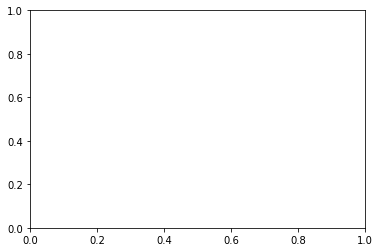

In [64]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
# Normalize the data.
X_train_norm = normalize(X_train)

# Reduce it to two components.
X_train_pca = PCA(2).fit_transform(X_train_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit(X_train_pca)
labels = y_pred.labels_
print(metrics.silhouette_score(X_train_pca, labels, metric='euclidean'))



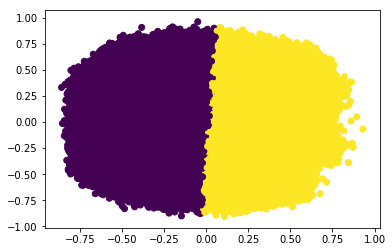

Comparing k-means clusters against the data:
reordered       0       1
row_0                    
0          165796  343924
1          223172  236339


In [67]:
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train_pca)

# Plot the solution.
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

# Adjusted Rand Score

In [65]:
full_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train_norm)
from sklearn import metrics
    
metrics.adjusted_rand_score(y_train, full_pred)

0.029962073447046548

Now let's try MiniBatch:

In [59]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_train_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_train_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))        


Comparing k-means and mini batch k-means solutions:
col_0       0       1
row_0                
0      505605    2014
1        4115  457497


# Mean-shift

In [69]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


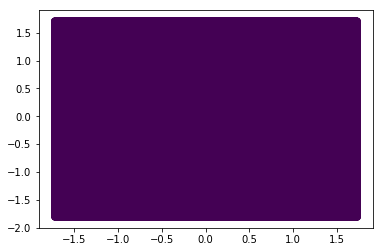

Comparing the assigned categories to the ones in the data:
col_0           0
reordered        
0          388968
1          580263


In [71]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

# Spectral Clustering

In [10]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=2)
sc.fit(X_train_pca)

#Predicted clusters.
predict=sc.fit_predict(X_train_pca)

#Graph results.
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

MemoryError: 

# Affinity Propogation

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train_pca)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

MemoryError: 

# Deep Learning

# RNN

In [21]:
# Training parameters.
batch_size = 64
num_classes = 2
epochs = 3

# Embedding dimensions.
row_hidden = 969231
col_hidden = 10
# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

#row, col, pixel = x_train.shape[1:]

# 4D input.
x = Input(shape=(10, 1))

# Encodes a row of pixels using TimeDistributed Wrapper.
#encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
#encoded_columns = LSTM(col_hidden)(encoded_rows)
encoded_columns = LSTM(10)
# Final predictions and model.
prediction = Dense(1, activation='softmax')
model = Model(x, prediction)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training.
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_train, y_train))

# Evaluation.
scores = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

ValueError: Output tensors to a Model must be the output of a Keras `Layer` (thus holding past layer metadata). Found: <keras.layers.core.Dense object at 0x0000022CC4815CC0>

In [ ]:
model = Sequential()
model.add(LSTM(300, input_shape=(X_train, X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

# convolutional neural networks(CNN)

In [12]:
# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv1D(32, kernel_size=(3),
                 activation='relu',input_shape=(10,1)))
model.add(Conv1D(64, (3), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
X_train = X_train.reshape(X_train.shape[0], 10, 1)
#X_train_pca = np.reshape(X_train[0],(10,1))
#X_test = np.reshape(X_test, (x_test.shape[0],10, 1))
model.fit(X_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(X_train, y_train))
score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 969231 samples, validate on 969231 samples
Epoch 1/3


 57856/969231 [>.............................] - ETA: 2:55:30 - loss: 5.9784 - acc: 0.62 - ETA: 1:31:11 - loss: 6.2898 - acc: 0.60 - ETA: 26:58 - loss: 6.1385 - acc: 0.6150 - ETA: 19:46 - loss: 6.1777 - acc: 0.61 - ETA: 18:41 - loss: 6.1596 - acc: 0.61 - ETA: 16:35 - loss: 6.2371 - acc: 0.60 - ETA: 12:20 - loss: 6.1375 - acc: 0.61 - ETA: 12:08 - loss: 6.1226 - acc: 0.61 - ETA: 10:47 - loss: 6.1369 - acc: 0.61 - ETA: 9:24 - loss: 6.1844 - acc: 0.6121 - ETA: 9:20 - loss: 6.1906 - acc: 0.611 - ETA: 8:55 - loss: 6.1717 - acc: 0.612 - ETA: 8:08 - loss: 6.2426 - acc: 0.608 - ETA: 7:53 - loss: 6.2311 - acc: 0.609 - ETA: 7:50 - loss: 6.2137 - acc: 0.610 - ETA: 7:48 - loss: 6.2208 - acc: 0.609 - ETA: 7:15 - loss: 6.2366 - acc: 0.608 - ETA: 7:08 - loss: 6.2333 - acc: 0.609 - ETA: 7:03 - loss: 6.2524 - acc: 0.607 - ETA: 6:37 - loss: 6.2936 - acc: 0.605 - ETA: 6:32 - loss: 6.2959 - acc: 0.605 - ETA: 6:18 - loss: 6.3105 - acc: 0.604 - ETA: 5:59 - loss: 6.3134 - acc: 0.604 - ETA: 5:42 - loss: 6.3219

115840/969231 [==>...........................] - ETA: 3:53 - loss: 6.3693 - acc: 0.600 - ETA: 3:53 - loss: 6.3723 - acc: 0.600 - ETA: 3:52 - loss: 6.3746 - acc: 0.600 - ETA: 3:52 - loss: 6.3745 - acc: 0.600 - ETA: 3:52 - loss: 6.3742 - acc: 0.600 - ETA: 3:53 - loss: 6.3728 - acc: 0.600 - ETA: 3:53 - loss: 6.3724 - acc: 0.600 - ETA: 3:54 - loss: 6.3721 - acc: 0.600 - ETA: 3:53 - loss: 6.3701 - acc: 0.600 - ETA: 3:53 - loss: 6.3750 - acc: 0.600 - ETA: 3:53 - loss: 6.3724 - acc: 0.600 - ETA: 3:54 - loss: 6.3739 - acc: 0.600 - ETA: 3:53 - loss: 6.3719 - acc: 0.600 - ETA: 3:54 - loss: 6.3705 - acc: 0.600 - ETA: 3:54 - loss: 6.3712 - acc: 0.600 - ETA: 3:54 - loss: 6.3712 - acc: 0.600 - ETA: 3:53 - loss: 6.3734 - acc: 0.600 - ETA: 3:52 - loss: 6.3699 - acc: 0.600 - ETA: 3:53 - loss: 6.3729 - acc: 0.600 - ETA: 3:53 - loss: 6.3726 - acc: 0.600 - ETA: 3:54 - loss: 6.3723 - acc: 0.600 - ETA: 3:54 - loss: 6.3685 - acc: 0.600 - ETA: 3:53 - loss: 6.3676 - acc: 0.600 - ETA: 3:54 - loss: 6.3721 - acc:

177536/969231 [====>.........................] - ETA: 3:27 - loss: 6.3661 - acc: 0.600 - ETA: 3:27 - loss: 6.3657 - acc: 0.600 - ETA: 3:26 - loss: 6.3666 - acc: 0.600 - ETA: 3:25 - loss: 6.3660 - acc: 0.600 - ETA: 3:25 - loss: 6.3659 - acc: 0.600 - ETA: 3:25 - loss: 6.3653 - acc: 0.600 - ETA: 3:24 - loss: 6.3654 - acc: 0.600 - ETA: 3:23 - loss: 6.3655 - acc: 0.600 - ETA: 3:23 - loss: 6.3629 - acc: 0.600 - ETA: 3:23 - loss: 6.3629 - acc: 0.600 - ETA: 3:22 - loss: 6.3661 - acc: 0.600 - ETA: 3:22 - loss: 6.3651 - acc: 0.600 - ETA: 3:23 - loss: 6.3653 - acc: 0.600 - ETA: 3:22 - loss: 6.3646 - acc: 0.600 - ETA: 3:22 - loss: 6.3644 - acc: 0.600 - ETA: 3:22 - loss: 6.3644 - acc: 0.600 - ETA: 3:22 - loss: 6.3632 - acc: 0.600 - ETA: 3:22 - loss: 6.3637 - acc: 0.600 - ETA: 3:22 - loss: 6.3628 - acc: 0.600 - ETA: 3:21 - loss: 6.3635 - acc: 0.600 - ETA: 3:21 - loss: 6.3612 - acc: 0.601 - ETA: 3:21 - loss: 6.3597 - acc: 0.601 - ETA: 3:21 - loss: 6.3595 - acc: 0.601 - ETA: 3:20 - loss: 6.3603 - acc:

222208/969231 [=====>........................] - ETA: 3:03 - loss: 6.3873 - acc: 0.599 - ETA: 3:03 - loss: 6.3876 - acc: 0.599 - ETA: 3:03 - loss: 6.3888 - acc: 0.599 - ETA: 3:03 - loss: 6.3889 - acc: 0.599 - ETA: 3:03 - loss: 6.3895 - acc: 0.599 - ETA: 3:03 - loss: 6.3892 - acc: 0.599 - ETA: 3:03 - loss: 6.3896 - acc: 0.599 - ETA: 3:03 - loss: 6.3898 - acc: 0.599 - ETA: 3:03 - loss: 6.3899 - acc: 0.599 - ETA: 3:03 - loss: 6.3905 - acc: 0.599 - ETA: 3:03 - loss: 6.3905 - acc: 0.599 - ETA: 3:03 - loss: 6.3900 - acc: 0.599 - ETA: 3:03 - loss: 6.3896 - acc: 0.599 - ETA: 3:03 - loss: 6.3900 - acc: 0.599 - ETA: 3:03 - loss: 6.3899 - acc: 0.599 - ETA: 3:03 - loss: 6.3888 - acc: 0.599 - ETA: 3:03 - loss: 6.3885 - acc: 0.599 - ETA: 3:03 - loss: 6.3882 - acc: 0.599 - ETA: 3:04 - loss: 6.3873 - acc: 0.599 - ETA: 3:04 - loss: 6.3869 - acc: 0.599 - ETA: 3:04 - loss: 6.3861 - acc: 0.599 - ETA: 3:04 - loss: 6.3861 - acc: 0.599 - ETA: 3:04 - loss: 6.3859 - acc: 0.599 - ETA: 3:04 - loss: 6.3858 - acc:

285696/969231 [=======>......................] - ETA: 3:06 - loss: 6.3871 - acc: 0.599 - ETA: 3:06 - loss: 6.3870 - acc: 0.599 - ETA: 3:06 - loss: 6.3867 - acc: 0.599 - ETA: 3:06 - loss: 6.3868 - acc: 0.599 - ETA: 3:05 - loss: 6.3877 - acc: 0.599 - ETA: 3:05 - loss: 6.3869 - acc: 0.599 - ETA: 3:05 - loss: 6.3863 - acc: 0.599 - ETA: 3:05 - loss: 6.3867 - acc: 0.599 - ETA: 3:05 - loss: 6.3878 - acc: 0.599 - ETA: 3:04 - loss: 6.3886 - acc: 0.599 - ETA: 3:04 - loss: 6.3898 - acc: 0.599 - ETA: 3:03 - loss: 6.3884 - acc: 0.599 - ETA: 3:03 - loss: 6.3871 - acc: 0.599 - ETA: 3:03 - loss: 6.3879 - acc: 0.599 - ETA: 3:02 - loss: 6.3878 - acc: 0.599 - ETA: 3:02 - loss: 6.3885 - acc: 0.599 - ETA: 3:02 - loss: 6.3885 - acc: 0.599 - ETA: 3:01 - loss: 6.3881 - acc: 0.599 - ETA: 3:01 - loss: 6.3880 - acc: 0.599 - ETA: 3:01 - loss: 6.3873 - acc: 0.599 - ETA: 3:01 - loss: 6.3874 - acc: 0.599 - ETA: 3:01 - loss: 6.3874 - acc: 0.599 - ETA: 3:01 - loss: 6.3874 - acc: 0.599 - ETA: 3:00 - loss: 6.3882 - acc:

392960/969231 [===========>..................] - ETA: 2:43 - loss: 6.3896 - acc: 0.599 - ETA: 2:43 - loss: 6.3911 - acc: 0.599 - ETA: 2:42 - loss: 6.3919 - acc: 0.599 - ETA: 2:42 - loss: 6.3910 - acc: 0.599 - ETA: 2:42 - loss: 6.3919 - acc: 0.599 - ETA: 2:42 - loss: 6.3922 - acc: 0.599 - ETA: 2:41 - loss: 6.3935 - acc: 0.599 - ETA: 2:41 - loss: 6.3936 - acc: 0.599 - ETA: 2:41 - loss: 6.3949 - acc: 0.598 - ETA: 2:40 - loss: 6.3944 - acc: 0.598 - ETA: 2:40 - loss: 6.3941 - acc: 0.598 - ETA: 2:40 - loss: 6.3943 - acc: 0.598 - ETA: 2:40 - loss: 6.3942 - acc: 0.598 - ETA: 2:40 - loss: 6.3940 - acc: 0.598 - ETA: 2:39 - loss: 6.3937 - acc: 0.599 - ETA: 2:39 - loss: 6.3937 - acc: 0.598 - ETA: 2:39 - loss: 6.3942 - acc: 0.598 - ETA: 2:39 - loss: 6.3936 - acc: 0.599 - ETA: 2:39 - loss: 6.3939 - acc: 0.598 - ETA: 2:39 - loss: 6.3946 - acc: 0.598 - ETA: 2:38 - loss: 6.3942 - acc: 0.598 - ETA: 2:38 - loss: 6.3945 - acc: 0.598 - ETA: 2:38 - loss: 6.3940 - acc: 0.598 - ETA: 2:38 - loss: 6.3941 - acc:

490368/969231 [==============>...............] - ETA: 1:58 - loss: 6.3945 - acc: 0.598 - ETA: 1:58 - loss: 6.3950 - acc: 0.598 - ETA: 1:57 - loss: 6.3943 - acc: 0.598 - ETA: 1:57 - loss: 6.3937 - acc: 0.598 - ETA: 1:57 - loss: 6.3927 - acc: 0.599 - ETA: 1:56 - loss: 6.3926 - acc: 0.599 - ETA: 1:56 - loss: 6.3916 - acc: 0.599 - ETA: 1:56 - loss: 6.3914 - acc: 0.599 - ETA: 1:55 - loss: 6.3918 - acc: 0.599 - ETA: 1:55 - loss: 6.3916 - acc: 0.599 - ETA: 1:55 - loss: 6.3911 - acc: 0.599 - ETA: 1:55 - loss: 6.3910 - acc: 0.599 - ETA: 1:54 - loss: 6.3908 - acc: 0.599 - ETA: 1:54 - loss: 6.3897 - acc: 0.599 - ETA: 1:54 - loss: 6.3893 - acc: 0.599 - ETA: 1:53 - loss: 6.3895 - acc: 0.599 - ETA: 1:53 - loss: 6.3901 - acc: 0.599 - ETA: 1:53 - loss: 6.3906 - acc: 0.599 - ETA: 1:52 - loss: 6.3913 - acc: 0.599 - ETA: 1:52 - loss: 6.3910 - acc: 0.599 - ETA: 1:52 - loss: 6.3902 - acc: 0.599 - ETA: 1:52 - loss: 6.3900 - acc: 0.599 - ETA: 1:51 - loss: 6.3905 - acc: 0.599 - ETA: 1:51 - loss: 6.3907 - acc:

554624/969231 [================>.............] - ETA: 1:30 - loss: 6.3944 - acc: 0.598 - ETA: 1:30 - loss: 6.3946 - acc: 0.598 - ETA: 1:30 - loss: 6.3949 - acc: 0.598 - ETA: 1:30 - loss: 6.3948 - acc: 0.598 - ETA: 1:30 - loss: 6.3945 - acc: 0.598 - ETA: 1:30 - loss: 6.3945 - acc: 0.598 - ETA: 1:30 - loss: 6.3944 - acc: 0.598 - ETA: 1:30 - loss: 6.3934 - acc: 0.599 - ETA: 1:30 - loss: 6.3935 - acc: 0.599 - ETA: 1:30 - loss: 6.3935 - acc: 0.599 - ETA: 1:30 - loss: 6.3941 - acc: 0.598 - ETA: 1:30 - loss: 6.3945 - acc: 0.598 - ETA: 1:30 - loss: 6.3947 - acc: 0.598 - ETA: 1:30 - loss: 6.3951 - acc: 0.598 - ETA: 1:30 - loss: 6.3949 - acc: 0.598 - ETA: 1:30 - loss: 6.3953 - acc: 0.598 - ETA: 1:29 - loss: 6.3958 - acc: 0.598 - ETA: 1:29 - loss: 6.3958 - acc: 0.598 - ETA: 1:29 - loss: 6.3959 - acc: 0.598 - ETA: 1:30 - loss: 6.3959 - acc: 0.598 - ETA: 1:29 - loss: 6.3954 - acc: 0.598 - ETA: 1:29 - loss: 6.3956 - acc: 0.598 - ETA: 1:30 - loss: 6.3956 - acc: 0.598 - ETA: 1:30 - loss: 6.3958 - acc:

627840/969231 [==================>...........] - ETA: 1:19 - loss: 6.3947 - acc: 0.598 - ETA: 1:18 - loss: 6.3946 - acc: 0.598 - ETA: 1:18 - loss: 6.3951 - acc: 0.598 - ETA: 1:18 - loss: 6.3954 - acc: 0.598 - ETA: 1:18 - loss: 6.3956 - acc: 0.598 - ETA: 1:18 - loss: 6.3956 - acc: 0.598 - ETA: 1:18 - loss: 6.3956 - acc: 0.598 - ETA: 1:18 - loss: 6.3954 - acc: 0.598 - ETA: 1:18 - loss: 6.3954 - acc: 0.598 - ETA: 1:18 - loss: 6.3952 - acc: 0.598 - ETA: 1:18 - loss: 6.3951 - acc: 0.598 - ETA: 1:18 - loss: 6.3951 - acc: 0.598 - ETA: 1:18 - loss: 6.3951 - acc: 0.598 - ETA: 1:18 - loss: 6.3946 - acc: 0.598 - ETA: 1:17 - loss: 6.3943 - acc: 0.598 - ETA: 1:17 - loss: 6.3942 - acc: 0.598 - ETA: 1:17 - loss: 6.3938 - acc: 0.598 - ETA: 1:17 - loss: 6.3940 - acc: 0.598 - ETA: 1:17 - loss: 6.3936 - acc: 0.599 - ETA: 1:17 - loss: 6.3932 - acc: 0.599 - ETA: 1:17 - loss: 6.3930 - acc: 0.599 - ETA: 1:17 - loss: 6.3931 - acc: 0.599 - ETA: 1:17 - loss: 6.3935 - acc: 0.599 - ETA: 1:17 - loss: 6.3939 - acc:

700416/969231 [====================>.........] - ETA: 1:04 - loss: 6.4002 - acc: 0.598 - ETA: 1:03 - loss: 6.4003 - acc: 0.598 - ETA: 1:03 - loss: 6.4003 - acc: 0.598 - ETA: 1:03 - loss: 6.4001 - acc: 0.598 - ETA: 1:03 - loss: 6.4005 - acc: 0.598 - ETA: 1:03 - loss: 6.4008 - acc: 0.598 - ETA: 1:03 - loss: 6.4011 - acc: 0.598 - ETA: 1:03 - loss: 6.4011 - acc: 0.598 - ETA: 1:03 - loss: 6.4011 - acc: 0.598 - ETA: 1:03 - loss: 6.4012 - acc: 0.598 - ETA: 1:03 - loss: 6.4012 - acc: 0.598 - ETA: 1:03 - loss: 6.4012 - acc: 0.598 - ETA: 1:03 - loss: 6.4009 - acc: 0.598 - ETA: 1:03 - loss: 6.4008 - acc: 0.598 - ETA: 1:02 - loss: 6.4009 - acc: 0.598 - ETA: 1:02 - loss: 6.4009 - acc: 0.598 - ETA: 1:02 - loss: 6.4007 - acc: 0.598 - ETA: 1:02 - loss: 6.4004 - acc: 0.598 - ETA: 1:02 - loss: 6.4002 - acc: 0.598 - ETA: 1:02 - loss: 6.4000 - acc: 0.598 - ETA: 1:02 - loss: 6.4003 - acc: 0.598 - ETA: 1:01 - loss: 6.4003 - acc: 0.598 - ETA: 1:01 - loss: 6.4000 - acc: 0.598 - ETA: 1:01 - loss: 6.4002 - acc:

745216/969231 [======================>.......] - ETA: 50s - loss: 6.3997 - acc: 0.59 - ETA: 50s - loss: 6.3997 - acc: 0.59 - ETA: 50s - loss: 6.3997 - acc: 0.59 - ETA: 50s - loss: 6.3996 - acc: 0.59 - ETA: 50s - loss: 6.3993 - acc: 0.59 - ETA: 49s - loss: 6.3991 - acc: 0.59 - ETA: 49s - loss: 6.3991 - acc: 0.59 - ETA: 49s - loss: 6.3990 - acc: 0.59 - ETA: 49s - loss: 6.3993 - acc: 0.59 - ETA: 49s - loss: 6.3992 - acc: 0.59 - ETA: 49s - loss: 6.3993 - acc: 0.59 - ETA: 49s - loss: 6.3992 - acc: 0.59 - ETA: 49s - loss: 6.3992 - acc: 0.59 - ETA: 49s - loss: 6.3993 - acc: 0.59 - ETA: 49s - loss: 6.3994 - acc: 0.59 - ETA: 49s - loss: 6.3995 - acc: 0.59 - ETA: 49s - loss: 6.3997 - acc: 0.59 - ETA: 49s - loss: 6.3996 - acc: 0.59 - ETA: 49s - loss: 6.3997 - acc: 0.59 - ETA: 49s - loss: 6.3996 - acc: 0.59 - ETA: 49s - loss: 6.3994 - acc: 0.59 - ETA: 49s - loss: 6.3996 - acc: 0.59 - ETA: 49s - loss: 6.3997 - acc: 0.59 - ETA: 49s - loss: 6.3998 - acc: 0.59 - ETA: 49s - loss: 6.3997 - acc: 0.59 - E

802304/969231 [=======================>......] - ETA: 43s - loss: 6.3978 - acc: 0.59 - ETA: 43s - loss: 6.3979 - acc: 0.59 - ETA: 43s - loss: 6.3975 - acc: 0.59 - ETA: 43s - loss: 6.3975 - acc: 0.59 - ETA: 43s - loss: 6.3973 - acc: 0.59 - ETA: 43s - loss: 6.3975 - acc: 0.59 - ETA: 42s - loss: 6.3974 - acc: 0.59 - ETA: 42s - loss: 6.3975 - acc: 0.59 - ETA: 42s - loss: 6.3972 - acc: 0.59 - ETA: 42s - loss: 6.3974 - acc: 0.59 - ETA: 42s - loss: 6.3973 - acc: 0.59 - ETA: 42s - loss: 6.3978 - acc: 0.59 - ETA: 42s - loss: 6.3978 - acc: 0.59 - ETA: 42s - loss: 6.3980 - acc: 0.59 - ETA: 42s - loss: 6.3982 - acc: 0.59 - ETA: 42s - loss: 6.3981 - acc: 0.59 - ETA: 41s - loss: 6.3981 - acc: 0.59 - ETA: 41s - loss: 6.3978 - acc: 0.59 - ETA: 41s - loss: 6.3979 - acc: 0.59 - ETA: 41s - loss: 6.3980 - acc: 0.59 - ETA: 41s - loss: 6.3982 - acc: 0.59 - ETA: 41s - loss: 6.3980 - acc: 0.59 - ETA: 41s - loss: 6.3984 - acc: 0.59 - ETA: 41s - loss: 6.3985 - acc: 0.59 - ETA: 41s - loss: 6.3982 - acc: 0.59 - E

857600/969231 [=========================>....] - ETA: 33s - loss: 6.3970 - acc: 0.59 - ETA: 33s - loss: 6.3970 - acc: 0.59 - ETA: 33s - loss: 6.3970 - acc: 0.59 - ETA: 33s - loss: 6.3971 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3967 - acc: 0.59 - ETA: 32s - loss: 6.3969 - acc: 0.59 - ETA: 32s - loss: 6.3969 - acc: 0.59 - ETA: 32s - loss: 6.3968 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3971 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3969 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3968 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3970 - acc: 0.59 - ETA: 32s - loss: 6.3971 - acc: 0.59 - ETA: 32s - loss: 6.3971 - acc: 0.59 - ETA: 32s - loss: 6.3972 - acc: 0.59 - E

948352/969231 [============================>.] - ETA: 22s - loss: 6.3959 - acc: 0.59 - ETA: 22s - loss: 6.3961 - acc: 0.59 - ETA: 22s - loss: 6.3960 - acc: 0.59 - ETA: 22s - loss: 6.3958 - acc: 0.59 - ETA: 22s - loss: 6.3957 - acc: 0.59 - ETA: 21s - loss: 6.3958 - acc: 0.59 - ETA: 21s - loss: 6.3957 - acc: 0.59 - ETA: 21s - loss: 6.3956 - acc: 0.59 - ETA: 21s - loss: 6.3955 - acc: 0.59 - ETA: 21s - loss: 6.3956 - acc: 0.59 - ETA: 21s - loss: 6.3956 - acc: 0.59 - ETA: 21s - loss: 6.3955 - acc: 0.59 - ETA: 21s - loss: 6.3953 - acc: 0.59 - ETA: 21s - loss: 6.3953 - acc: 0.59 - ETA: 21s - loss: 6.3953 - acc: 0.59 - ETA: 21s - loss: 6.3953 - acc: 0.59 - ETA: 21s - loss: 6.3954 - acc: 0.59 - ETA: 21s - loss: 6.3955 - acc: 0.59 - ETA: 20s - loss: 6.3956 - acc: 0.59 - ETA: 20s - loss: 6.3959 - acc: 0.59 - ETA: 20s - loss: 6.3961 - acc: 0.59 - ETA: 20s - loss: 6.3962 - acc: 0.59 - ETA: 20s - loss: 6.3964 - acc: 0.59 - ETA: 20s - loss: 6.3967 - acc: 0.59 - ETA: 20s - loss: 6.3969 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 4s - loss: 6.3984 - acc: 0.598 - ETA: 3s - loss: 6.3985 - acc: 0.598 - ETA: 3s - loss: 6.3986 - acc: 0.598 - ETA: 3s - loss: 6.3988 - acc: 0.598 - ETA: 3s - loss: 6.3984 - acc: 0.598 - ETA: 3s - loss: 6.3986 - acc: 0.598 - ETA: 3s - loss: 6.3984 - acc: 0.598 - ETA: 3s - loss: 6.3985 - acc: 0.598 - ETA: 3s - loss: 6.3987 - acc: 0.598 - ETA: 3s - loss: 6.3989 - acc: 0.598 - ETA: 3s - loss: 6.3989 - acc: 0.598 - ETA: 3s - loss: 6.3986 - acc: 0.598 - ETA: 3s - loss: 6.3987 - acc: 0.598 - ETA: 2s - loss: 6.3986 - acc: 0.598 - ETA: 2s - loss: 6.3985 - acc: 0.598 - ETA: 2s - loss: 6.3985 - acc: 0.598 - ETA: 2s - loss: 6.3984 - acc: 0.598 - ETA: 2s - loss: 6.3983 - acc: 0.598 - ETA: 2s - loss: 6.3985 - acc: 0.598 - ETA: 2s - loss: 6.3986 - acc: 0.598 - ETA: 2s - loss: 6.3983 - acc: 0.598 - ETA: 2s - loss: 6.3982 - acc: 0.598 - ETA: 2s - loss: 6.3982 - acc: 0.598 - ETA: 2s - loss: 6.3981 - acc: 0.598 - ETA: 2s - loss: 6.3981 - acc: 0.598 - E

 56448/969231 [>.............................] - ETA: 10:35 - loss: 7.8466 - acc: 0.50 - ETA: 4:32 - loss: 6.4766 - acc: 0.5938 - ETA: 3:31 - loss: 6.5300 - acc: 0.590 - ETA: 3:52 - loss: 6.6323 - acc: 0.584 - ETA: 4:10 - loss: 6.5319 - acc: 0.590 - ETA: 4:49 - loss: 6.5887 - acc: 0.586 - ETA: 3:56 - loss: 6.5834 - acc: 0.587 - ETA: 3:39 - loss: 6.6744 - acc: 0.581 - ETA: 3:30 - loss: 6.6136 - acc: 0.585 - ETA: 3:29 - loss: 6.6125 - acc: 0.585 - ETA: 3:37 - loss: 6.6391 - acc: 0.583 - ETA: 3:27 - loss: 6.6299 - acc: 0.584 - ETA: 3:30 - loss: 6.6234 - acc: 0.584 - ETA: 3:38 - loss: 6.5754 - acc: 0.587 - ETA: 3:38 - loss: 6.5288 - acc: 0.590 - ETA: 3:49 - loss: 6.5194 - acc: 0.591 - ETA: 3:40 - loss: 6.5086 - acc: 0.591 - ETA: 3:40 - loss: 6.4968 - acc: 0.592 - ETA: 3:31 - loss: 6.4948 - acc: 0.592 - ETA: 3:23 - loss: 6.4849 - acc: 0.593 - ETA: 3:14 - loss: 6.4613 - acc: 0.594 - ETA: 3:16 - loss: 6.4546 - acc: 0.595 - ETA: 3:25 - loss: 6.4479 - acc: 0.595 - ETA: 3:34 - loss: 6.4531 - acc

107392/969231 [==>...........................] - ETA: 3:30 - loss: 6.3987 - acc: 0.598 - ETA: 3:30 - loss: 6.4002 - acc: 0.598 - ETA: 3:30 - loss: 6.3977 - acc: 0.598 - ETA: 3:30 - loss: 6.3982 - acc: 0.598 - ETA: 3:30 - loss: 6.3925 - acc: 0.599 - ETA: 3:31 - loss: 6.3951 - acc: 0.598 - ETA: 3:31 - loss: 6.3941 - acc: 0.598 - ETA: 3:31 - loss: 6.3920 - acc: 0.599 - ETA: 3:31 - loss: 6.3904 - acc: 0.599 - ETA: 3:31 - loss: 6.3916 - acc: 0.599 - ETA: 3:31 - loss: 6.3909 - acc: 0.599 - ETA: 3:31 - loss: 6.3965 - acc: 0.598 - ETA: 3:31 - loss: 6.3982 - acc: 0.598 - ETA: 3:31 - loss: 6.3977 - acc: 0.598 - ETA: 3:31 - loss: 6.3968 - acc: 0.598 - ETA: 3:32 - loss: 6.3967 - acc: 0.598 - ETA: 3:32 - loss: 6.3974 - acc: 0.598 - ETA: 3:32 - loss: 6.3973 - acc: 0.598 - ETA: 3:32 - loss: 6.4016 - acc: 0.598 - ETA: 3:33 - loss: 6.3972 - acc: 0.598 - ETA: 3:33 - loss: 6.3958 - acc: 0.598 - ETA: 3:34 - loss: 6.3931 - acc: 0.599 - ETA: 3:34 - loss: 6.3920 - acc: 0.599 - ETA: 3:34 - loss: 6.3906 - acc:

160896/969231 [===>..........................] - ETA: 3:30 - loss: 6.4100 - acc: 0.597 - ETA: 3:30 - loss: 6.4097 - acc: 0.597 - ETA: 3:30 - loss: 6.4084 - acc: 0.598 - ETA: 3:30 - loss: 6.4086 - acc: 0.598 - ETA: 3:30 - loss: 6.4094 - acc: 0.598 - ETA: 3:30 - loss: 6.4091 - acc: 0.598 - ETA: 3:30 - loss: 6.4092 - acc: 0.598 - ETA: 3:30 - loss: 6.4101 - acc: 0.597 - ETA: 3:30 - loss: 6.4085 - acc: 0.598 - ETA: 3:30 - loss: 6.4073 - acc: 0.598 - ETA: 3:30 - loss: 6.4054 - acc: 0.598 - ETA: 3:29 - loss: 6.4039 - acc: 0.598 - ETA: 3:29 - loss: 6.4053 - acc: 0.598 - ETA: 3:29 - loss: 6.4062 - acc: 0.598 - ETA: 3:29 - loss: 6.4069 - acc: 0.598 - ETA: 3:29 - loss: 6.4062 - acc: 0.598 - ETA: 3:29 - loss: 6.4063 - acc: 0.598 - ETA: 3:29 - loss: 6.4067 - acc: 0.598 - ETA: 3:29 - loss: 6.4088 - acc: 0.598 - ETA: 3:29 - loss: 6.4083 - acc: 0.598 - ETA: 3:29 - loss: 6.4085 - acc: 0.598 - ETA: 3:29 - loss: 6.4086 - acc: 0.598 - ETA: 3:29 - loss: 6.4093 - acc: 0.598 - ETA: 3:29 - loss: 6.4082 - acc:

221056/969231 [=====>........................] - ETA: 3:13 - loss: 6.4010 - acc: 0.598 - ETA: 3:13 - loss: 6.4007 - acc: 0.598 - ETA: 3:13 - loss: 6.4012 - acc: 0.598 - ETA: 3:13 - loss: 6.4012 - acc: 0.598 - ETA: 3:13 - loss: 6.4015 - acc: 0.598 - ETA: 3:13 - loss: 6.4024 - acc: 0.598 - ETA: 3:13 - loss: 6.4036 - acc: 0.598 - ETA: 3:13 - loss: 6.4037 - acc: 0.598 - ETA: 3:13 - loss: 6.4030 - acc: 0.598 - ETA: 3:13 - loss: 6.4029 - acc: 0.598 - ETA: 3:13 - loss: 6.4023 - acc: 0.598 - ETA: 3:13 - loss: 6.4019 - acc: 0.598 - ETA: 3:13 - loss: 6.4023 - acc: 0.598 - ETA: 3:13 - loss: 6.4007 - acc: 0.598 - ETA: 3:13 - loss: 6.4014 - acc: 0.598 - ETA: 3:13 - loss: 6.4011 - acc: 0.598 - ETA: 3:13 - loss: 6.4011 - acc: 0.598 - ETA: 3:13 - loss: 6.4008 - acc: 0.598 - ETA: 3:12 - loss: 6.4008 - acc: 0.598 - ETA: 3:12 - loss: 6.4009 - acc: 0.598 - ETA: 3:12 - loss: 6.4011 - acc: 0.598 - ETA: 3:12 - loss: 6.4009 - acc: 0.598 - ETA: 3:12 - loss: 6.4009 - acc: 0.598 - ETA: 3:12 - loss: 6.3999 - acc:

307840/969231 [========>.....................] - ETA: 2:52 - loss: 6.3900 - acc: 0.599 - ETA: 2:52 - loss: 6.3895 - acc: 0.599 - ETA: 2:51 - loss: 6.3911 - acc: 0.599 - ETA: 2:51 - loss: 6.3911 - acc: 0.599 - ETA: 2:51 - loss: 6.3900 - acc: 0.599 - ETA: 2:50 - loss: 6.3899 - acc: 0.599 - ETA: 2:50 - loss: 6.3898 - acc: 0.599 - ETA: 2:50 - loss: 6.3906 - acc: 0.599 - ETA: 2:50 - loss: 6.3910 - acc: 0.599 - ETA: 2:50 - loss: 6.3916 - acc: 0.599 - ETA: 2:50 - loss: 6.3917 - acc: 0.599 - ETA: 2:49 - loss: 6.3933 - acc: 0.599 - ETA: 2:49 - loss: 6.3940 - acc: 0.598 - ETA: 2:49 - loss: 6.3941 - acc: 0.598 - ETA: 2:48 - loss: 6.3953 - acc: 0.598 - ETA: 2:48 - loss: 6.3953 - acc: 0.598 - ETA: 2:48 - loss: 6.3965 - acc: 0.598 - ETA: 2:47 - loss: 6.3968 - acc: 0.598 - ETA: 2:47 - loss: 6.3966 - acc: 0.598 - ETA: 2:47 - loss: 6.3964 - acc: 0.598 - ETA: 2:47 - loss: 6.3964 - acc: 0.598 - ETA: 2:47 - loss: 6.3968 - acc: 0.598 - ETA: 2:47 - loss: 6.3985 - acc: 0.598 - ETA: 2:46 - loss: 6.3989 - acc:

392704/969231 [===========>..................] - ETA: 2:14 - loss: 6.3996 - acc: 0.598 - ETA: 2:14 - loss: 6.3997 - acc: 0.598 - ETA: 2:14 - loss: 6.3993 - acc: 0.598 - ETA: 2:14 - loss: 6.3997 - acc: 0.598 - ETA: 2:13 - loss: 6.4001 - acc: 0.598 - ETA: 2:13 - loss: 6.4009 - acc: 0.598 - ETA: 2:13 - loss: 6.4006 - acc: 0.598 - ETA: 2:12 - loss: 6.4010 - acc: 0.598 - ETA: 2:12 - loss: 6.4010 - acc: 0.598 - ETA: 2:12 - loss: 6.4014 - acc: 0.598 - ETA: 2:12 - loss: 6.4019 - acc: 0.598 - ETA: 2:11 - loss: 6.4021 - acc: 0.598 - ETA: 2:11 - loss: 6.4018 - acc: 0.598 - ETA: 2:11 - loss: 6.4015 - acc: 0.598 - ETA: 2:11 - loss: 6.4022 - acc: 0.598 - ETA: 2:11 - loss: 6.4017 - acc: 0.598 - ETA: 2:11 - loss: 6.4012 - acc: 0.598 - ETA: 2:11 - loss: 6.4014 - acc: 0.598 - ETA: 2:11 - loss: 6.4009 - acc: 0.598 - ETA: 2:11 - loss: 6.4010 - acc: 0.598 - ETA: 2:10 - loss: 6.4003 - acc: 0.598 - ETA: 2:10 - loss: 6.4002 - acc: 0.598 - ETA: 2:10 - loss: 6.4003 - acc: 0.598 - ETA: 2:10 - loss: 6.4010 - acc:

477056/969231 [=============>................] - ETA: 1:49 - loss: 6.3947 - acc: 0.598 - ETA: 1:48 - loss: 6.3945 - acc: 0.598 - ETA: 1:48 - loss: 6.3947 - acc: 0.598 - ETA: 1:48 - loss: 6.3952 - acc: 0.598 - ETA: 1:48 - loss: 6.3957 - acc: 0.598 - ETA: 1:48 - loss: 6.3964 - acc: 0.598 - ETA: 1:48 - loss: 6.3967 - acc: 0.598 - ETA: 1:48 - loss: 6.3965 - acc: 0.598 - ETA: 1:48 - loss: 6.3967 - acc: 0.598 - ETA: 1:48 - loss: 6.3968 - acc: 0.598 - ETA: 1:48 - loss: 6.3973 - acc: 0.598 - ETA: 1:48 - loss: 6.3982 - acc: 0.598 - ETA: 1:47 - loss: 6.3978 - acc: 0.598 - ETA: 1:47 - loss: 6.3977 - acc: 0.598 - ETA: 1:47 - loss: 6.3971 - acc: 0.598 - ETA: 1:47 - loss: 6.3972 - acc: 0.598 - ETA: 1:47 - loss: 6.3969 - acc: 0.598 - ETA: 1:47 - loss: 6.3971 - acc: 0.598 - ETA: 1:47 - loss: 6.3973 - acc: 0.598 - ETA: 1:47 - loss: 6.3979 - acc: 0.598 - ETA: 1:46 - loss: 6.3979 - acc: 0.598 - ETA: 1:46 - loss: 6.3976 - acc: 0.598 - ETA: 1:46 - loss: 6.3971 - acc: 0.598 - ETA: 1:46 - loss: 6.3971 - acc:

569344/969231 [================>.............] - ETA: 1:28 - loss: 6.3984 - acc: 0.598 - ETA: 1:28 - loss: 6.3985 - acc: 0.598 - ETA: 1:28 - loss: 6.3987 - acc: 0.598 - ETA: 1:28 - loss: 6.3988 - acc: 0.598 - ETA: 1:28 - loss: 6.3993 - acc: 0.598 - ETA: 1:28 - loss: 6.3995 - acc: 0.598 - ETA: 1:28 - loss: 6.3995 - acc: 0.598 - ETA: 1:28 - loss: 6.3991 - acc: 0.598 - ETA: 1:27 - loss: 6.3995 - acc: 0.598 - ETA: 1:27 - loss: 6.3999 - acc: 0.598 - ETA: 1:27 - loss: 6.4003 - acc: 0.598 - ETA: 1:27 - loss: 6.3999 - acc: 0.598 - ETA: 1:27 - loss: 6.4000 - acc: 0.598 - ETA: 1:27 - loss: 6.4000 - acc: 0.598 - ETA: 1:27 - loss: 6.4002 - acc: 0.598 - ETA: 1:26 - loss: 6.4007 - acc: 0.598 - ETA: 1:26 - loss: 6.4005 - acc: 0.598 - ETA: 1:26 - loss: 6.4007 - acc: 0.598 - ETA: 1:26 - loss: 6.4002 - acc: 0.598 - ETA: 1:25 - loss: 6.3991 - acc: 0.598 - ETA: 1:25 - loss: 6.3990 - acc: 0.598 - ETA: 1:25 - loss: 6.3988 - acc: 0.598 - ETA: 1:25 - loss: 6.3990 - acc: 0.598 - ETA: 1:25 - loss: 6.3992 - acc:

631168/969231 [==================>...........] - ETA: 1:08 - loss: 6.4029 - acc: 0.598 - ETA: 1:08 - loss: 6.4026 - acc: 0.598 - ETA: 1:08 - loss: 6.4021 - acc: 0.598 - ETA: 1:08 - loss: 6.4021 - acc: 0.598 - ETA: 1:08 - loss: 6.4019 - acc: 0.598 - ETA: 1:08 - loss: 6.4020 - acc: 0.598 - ETA: 1:08 - loss: 6.4019 - acc: 0.598 - ETA: 1:08 - loss: 6.4014 - acc: 0.598 - ETA: 1:08 - loss: 6.4010 - acc: 0.598 - ETA: 1:08 - loss: 6.4007 - acc: 0.598 - ETA: 1:07 - loss: 6.4008 - acc: 0.598 - ETA: 1:07 - loss: 6.4009 - acc: 0.598 - ETA: 1:07 - loss: 6.4004 - acc: 0.598 - ETA: 1:07 - loss: 6.4006 - acc: 0.598 - ETA: 1:07 - loss: 6.4006 - acc: 0.598 - ETA: 1:07 - loss: 6.4007 - acc: 0.598 - ETA: 1:07 - loss: 6.4009 - acc: 0.598 - ETA: 1:07 - loss: 6.4011 - acc: 0.598 - ETA: 1:07 - loss: 6.4007 - acc: 0.598 - ETA: 1:07 - loss: 6.4004 - acc: 0.598 - ETA: 1:07 - loss: 6.4004 - acc: 0.598 - ETA: 1:07 - loss: 6.4003 - acc: 0.598 - ETA: 1:06 - loss: 6.4002 - acc: 0.598 - ETA: 1:06 - loss: 6.4003 - acc:

689152/969231 [====================>.........] - ETA: 59s - loss: 6.4017 - acc: 0.59 - ETA: 59s - loss: 6.4015 - acc: 0.59 - ETA: 58s - loss: 6.4012 - acc: 0.59 - ETA: 58s - loss: 6.4012 - acc: 0.59 - ETA: 58s - loss: 6.4009 - acc: 0.59 - ETA: 58s - loss: 6.4008 - acc: 0.59 - ETA: 58s - loss: 6.4009 - acc: 0.59 - ETA: 58s - loss: 6.4007 - acc: 0.59 - ETA: 58s - loss: 6.4007 - acc: 0.59 - ETA: 58s - loss: 6.4007 - acc: 0.59 - ETA: 58s - loss: 6.4006 - acc: 0.59 - ETA: 58s - loss: 6.4007 - acc: 0.59 - ETA: 58s - loss: 6.4002 - acc: 0.59 - ETA: 58s - loss: 6.4002 - acc: 0.59 - ETA: 58s - loss: 6.4006 - acc: 0.59 - ETA: 58s - loss: 6.4006 - acc: 0.59 - ETA: 58s - loss: 6.4005 - acc: 0.59 - ETA: 58s - loss: 6.4004 - acc: 0.59 - ETA: 58s - loss: 6.4003 - acc: 0.59 - ETA: 58s - loss: 6.4002 - acc: 0.59 - ETA: 58s - loss: 6.4001 - acc: 0.59 - ETA: 58s - loss: 6.3997 - acc: 0.59 - ETA: 58s - loss: 6.3999 - acc: 0.59 - ETA: 57s - loss: 6.4003 - acc: 0.59 - ETA: 57s - loss: 6.4003 - acc: 0.59 - E

743808/969231 [======================>.......] - ETA: 50s - loss: 6.3999 - acc: 0.59 - ETA: 50s - loss: 6.3997 - acc: 0.59 - ETA: 50s - loss: 6.3995 - acc: 0.59 - ETA: 50s - loss: 6.3994 - acc: 0.59 - ETA: 50s - loss: 6.3989 - acc: 0.59 - ETA: 49s - loss: 6.3990 - acc: 0.59 - ETA: 49s - loss: 6.3985 - acc: 0.59 - ETA: 49s - loss: 6.3985 - acc: 0.59 - ETA: 49s - loss: 6.3982 - acc: 0.59 - ETA: 49s - loss: 6.3983 - acc: 0.59 - ETA: 49s - loss: 6.3985 - acc: 0.59 - ETA: 49s - loss: 6.3986 - acc: 0.59 - ETA: 49s - loss: 6.3987 - acc: 0.59 - ETA: 49s - loss: 6.3991 - acc: 0.59 - ETA: 49s - loss: 6.3993 - acc: 0.59 - ETA: 49s - loss: 6.3991 - acc: 0.59 - ETA: 49s - loss: 6.3992 - acc: 0.59 - ETA: 49s - loss: 6.3990 - acc: 0.59 - ETA: 49s - loss: 6.3991 - acc: 0.59 - ETA: 49s - loss: 6.3988 - acc: 0.59 - ETA: 49s - loss: 6.3991 - acc: 0.59 - ETA: 49s - loss: 6.3991 - acc: 0.59 - ETA: 49s - loss: 6.3992 - acc: 0.59 - ETA: 49s - loss: 6.3993 - acc: 0.59 - ETA: 48s - loss: 6.3995 - acc: 0.59 - E

830848/969231 [========================>.....] - ETA: 41s - loss: 6.3995 - acc: 0.59 - ETA: 41s - loss: 6.3995 - acc: 0.59 - ETA: 41s - loss: 6.3993 - acc: 0.59 - ETA: 41s - loss: 6.3993 - acc: 0.59 - ETA: 41s - loss: 6.3993 - acc: 0.59 - ETA: 41s - loss: 6.3993 - acc: 0.59 - ETA: 41s - loss: 6.3993 - acc: 0.59 - ETA: 41s - loss: 6.3992 - acc: 0.59 - ETA: 41s - loss: 6.3992 - acc: 0.59 - ETA: 41s - loss: 6.3991 - acc: 0.59 - ETA: 41s - loss: 6.3990 - acc: 0.59 - ETA: 41s - loss: 6.3991 - acc: 0.59 - ETA: 41s - loss: 6.3991 - acc: 0.59 - ETA: 41s - loss: 6.3993 - acc: 0.59 - ETA: 41s - loss: 6.3997 - acc: 0.59 - ETA: 41s - loss: 6.3998 - acc: 0.59 - ETA: 41s - loss: 6.3999 - acc: 0.59 - ETA: 41s - loss: 6.4000 - acc: 0.59 - ETA: 41s - loss: 6.4002 - acc: 0.59 - ETA: 40s - loss: 6.4006 - acc: 0.59 - ETA: 40s - loss: 6.4009 - acc: 0.59 - ETA: 40s - loss: 6.4008 - acc: 0.59 - ETA: 40s - loss: 6.4008 - acc: 0.59 - ETA: 40s - loss: 6.4005 - acc: 0.59 - ETA: 40s - loss: 6.4006 - acc: 0.59 - E

912640/969231 [===========================>..] - ETA: 24s - loss: 6.4040 - acc: 0.59 - ETA: 24s - loss: 6.4041 - acc: 0.59 - ETA: 24s - loss: 6.4038 - acc: 0.59 - ETA: 24s - loss: 6.4041 - acc: 0.59 - ETA: 24s - loss: 6.4042 - acc: 0.59 - ETA: 24s - loss: 6.4044 - acc: 0.59 - ETA: 24s - loss: 6.4042 - acc: 0.59 - ETA: 24s - loss: 6.4039 - acc: 0.59 - ETA: 24s - loss: 6.4041 - acc: 0.59 - ETA: 24s - loss: 6.4042 - acc: 0.59 - ETA: 24s - loss: 6.4044 - acc: 0.59 - ETA: 24s - loss: 6.4045 - acc: 0.59 - ETA: 23s - loss: 6.4047 - acc: 0.59 - ETA: 23s - loss: 6.4047 - acc: 0.59 - ETA: 23s - loss: 6.4044 - acc: 0.59 - ETA: 23s - loss: 6.4044 - acc: 0.59 - ETA: 23s - loss: 6.4045 - acc: 0.59 - ETA: 23s - loss: 6.4046 - acc: 0.59 - ETA: 23s - loss: 6.4048 - acc: 0.59 - ETA: 23s - loss: 6.4049 - acc: 0.59 - ETA: 23s - loss: 6.4049 - acc: 0.59 - ETA: 23s - loss: 6.4049 - acc: 0.59 - ETA: 23s - loss: 6.4045 - acc: 0.59 - ETA: 23s - loss: 6.4044 - acc: 0.59 - ETA: 23s - loss: 6.4042 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 10s - loss: 6.3990 - acc: 0.59 - ETA: 9s - loss: 6.3990 - acc: 0.5986 - ETA: 9s - loss: 6.3990 - acc: 0.598 - ETA: 9s - loss: 6.3988 - acc: 0.598 - ETA: 9s - loss: 6.3985 - acc: 0.598 - ETA: 9s - loss: 6.3985 - acc: 0.598 - ETA: 9s - loss: 6.3984 - acc: 0.598 - ETA: 9s - loss: 6.3985 - acc: 0.598 - ETA: 9s - loss: 6.3982 - acc: 0.598 - ETA: 9s - loss: 6.3982 - acc: 0.598 - ETA: 9s - loss: 6.3981 - acc: 0.598 - ETA: 9s - loss: 6.3982 - acc: 0.598 - ETA: 9s - loss: 6.3982 - acc: 0.598 - ETA: 9s - loss: 6.3983 - acc: 0.598 - ETA: 8s - loss: 6.3986 - acc: 0.598 - ETA: 8s - loss: 6.3985 - acc: 0.598 - ETA: 8s - loss: 6.3984 - acc: 0.598 - ETA: 8s - loss: 6.3986 - acc: 0.598 - ETA: 8s - loss: 6.3987 - acc: 0.598 - ETA: 8s - loss: 6.3987 - acc: 0.598 - ETA: 8s - loss: 6.3988 - acc: 0.598 - ETA: 8s - loss: 6.3988 - acc: 0.598 - ETA: 8s - loss: 6.3986 - acc: 0.598 - ETA: 8s - loss: 6.3985 - acc: 0.598 - ETA: 8s - loss: 6.3987 - acc: 0.598 - 

 69504/969231 [=>............................] - ETA: 9:00 - loss: 5.3556 - acc: 0.664 - ETA: 3:53 - loss: 5.8227 - acc: 0.634 - ETA: 3:35 - loss: 6.1385 - acc: 0.615 - ETA: 3:31 - loss: 6.1583 - acc: 0.613 - ETA: 2:58 - loss: 6.2946 - acc: 0.605 - ETA: 2:54 - loss: 6.2353 - acc: 0.608 - ETA: 2:48 - loss: 6.1619 - acc: 0.613 - ETA: 2:51 - loss: 6.0852 - acc: 0.618 - ETA: 2:37 - loss: 6.1317 - acc: 0.615 - ETA: 2:27 - loss: 6.1471 - acc: 0.614 - ETA: 2:25 - loss: 6.1359 - acc: 0.615 - ETA: 2:28 - loss: 6.1237 - acc: 0.615 - ETA: 2:28 - loss: 6.1988 - acc: 0.611 - ETA: 2:27 - loss: 6.1919 - acc: 0.611 - ETA: 2:23 - loss: 6.2356 - acc: 0.608 - ETA: 2:22 - loss: 6.2097 - acc: 0.610 - ETA: 2:20 - loss: 6.1852 - acc: 0.612 - ETA: 2:20 - loss: 6.2075 - acc: 0.610 - ETA: 2:19 - loss: 6.1958 - acc: 0.611 - ETA: 2:24 - loss: 6.2150 - acc: 0.610 - ETA: 2:23 - loss: 6.2295 - acc: 0.609 - ETA: 2:23 - loss: 6.2388 - acc: 0.608 - ETA: 2:19 - loss: 6.2503 - acc: 0.607 - ETA: 2:16 - loss: 6.2717 - acc:

123264/969231 [==>...........................] - ETA: 2:40 - loss: 6.4136 - acc: 0.597 - ETA: 2:40 - loss: 6.4143 - acc: 0.597 - ETA: 2:40 - loss: 6.4115 - acc: 0.597 - ETA: 2:41 - loss: 6.4119 - acc: 0.597 - ETA: 2:41 - loss: 6.4123 - acc: 0.597 - ETA: 2:41 - loss: 6.4115 - acc: 0.597 - ETA: 2:42 - loss: 6.4118 - acc: 0.597 - ETA: 2:42 - loss: 6.4132 - acc: 0.597 - ETA: 2:42 - loss: 6.4141 - acc: 0.597 - ETA: 2:42 - loss: 6.4128 - acc: 0.597 - ETA: 2:42 - loss: 6.4119 - acc: 0.597 - ETA: 2:42 - loss: 6.4112 - acc: 0.597 - ETA: 2:42 - loss: 6.4077 - acc: 0.598 - ETA: 2:43 - loss: 6.4052 - acc: 0.598 - ETA: 2:43 - loss: 6.4060 - acc: 0.598 - ETA: 2:44 - loss: 6.4070 - acc: 0.598 - ETA: 2:43 - loss: 6.4047 - acc: 0.598 - ETA: 2:43 - loss: 6.4039 - acc: 0.598 - ETA: 2:43 - loss: 6.4055 - acc: 0.598 - ETA: 2:44 - loss: 6.4073 - acc: 0.598 - ETA: 2:44 - loss: 6.4086 - acc: 0.598 - ETA: 2:44 - loss: 6.4086 - acc: 0.598 - ETA: 2:44 - loss: 6.4113 - acc: 0.597 - ETA: 2:45 - loss: 6.4106 - acc:

179840/969231 [====>.........................] - ETA: 2:50 - loss: 6.3944 - acc: 0.598 - ETA: 2:50 - loss: 6.3948 - acc: 0.598 - ETA: 2:50 - loss: 6.3948 - acc: 0.598 - ETA: 2:50 - loss: 6.3946 - acc: 0.598 - ETA: 2:51 - loss: 6.3952 - acc: 0.598 - ETA: 2:51 - loss: 6.3937 - acc: 0.599 - ETA: 2:51 - loss: 6.3931 - acc: 0.599 - ETA: 2:51 - loss: 6.3923 - acc: 0.599 - ETA: 2:51 - loss: 6.3916 - acc: 0.599 - ETA: 2:51 - loss: 6.3905 - acc: 0.599 - ETA: 2:51 - loss: 6.3903 - acc: 0.599 - ETA: 2:50 - loss: 6.3904 - acc: 0.599 - ETA: 2:50 - loss: 6.3909 - acc: 0.599 - ETA: 2:50 - loss: 6.3909 - acc: 0.599 - ETA: 2:50 - loss: 6.3907 - acc: 0.599 - ETA: 2:50 - loss: 6.3897 - acc: 0.599 - ETA: 2:50 - loss: 6.3902 - acc: 0.599 - ETA: 2:50 - loss: 6.3910 - acc: 0.599 - ETA: 2:51 - loss: 6.3901 - acc: 0.599 - ETA: 2:51 - loss: 6.3904 - acc: 0.599 - ETA: 2:51 - loss: 6.3895 - acc: 0.599 - ETA: 2:51 - loss: 6.3897 - acc: 0.599 - ETA: 2:51 - loss: 6.3884 - acc: 0.599 - ETA: 2:51 - loss: 6.3892 - acc:

250624/969231 [======>.......................] - ETA: 2:43 - loss: 6.3939 - acc: 0.598 - ETA: 2:44 - loss: 6.3931 - acc: 0.599 - ETA: 2:44 - loss: 6.3934 - acc: 0.599 - ETA: 2:44 - loss: 6.3928 - acc: 0.599 - ETA: 2:44 - loss: 6.3928 - acc: 0.599 - ETA: 2:44 - loss: 6.3924 - acc: 0.599 - ETA: 2:44 - loss: 6.3922 - acc: 0.599 - ETA: 2:44 - loss: 6.3919 - acc: 0.599 - ETA: 2:44 - loss: 6.3926 - acc: 0.599 - ETA: 2:44 - loss: 6.3926 - acc: 0.599 - ETA: 2:44 - loss: 6.3913 - acc: 0.599 - ETA: 2:44 - loss: 6.3917 - acc: 0.599 - ETA: 2:44 - loss: 6.3917 - acc: 0.599 - ETA: 2:44 - loss: 6.3935 - acc: 0.599 - ETA: 2:44 - loss: 6.3937 - acc: 0.599 - ETA: 2:44 - loss: 6.3934 - acc: 0.599 - ETA: 2:44 - loss: 6.3948 - acc: 0.598 - ETA: 2:44 - loss: 6.3948 - acc: 0.598 - ETA: 2:44 - loss: 6.3945 - acc: 0.598 - ETA: 2:44 - loss: 6.3944 - acc: 0.598 - ETA: 2:44 - loss: 6.3943 - acc: 0.598 - ETA: 2:44 - loss: 6.3944 - acc: 0.598 - ETA: 2:44 - loss: 6.3940 - acc: 0.598 - ETA: 2:44 - loss: 6.3941 - acc:

340480/969231 [=========>....................] - ETA: 2:21 - loss: 6.3881 - acc: 0.599 - ETA: 2:21 - loss: 6.3884 - acc: 0.599 - ETA: 2:21 - loss: 6.3883 - acc: 0.599 - ETA: 2:21 - loss: 6.3874 - acc: 0.599 - ETA: 2:21 - loss: 6.3882 - acc: 0.599 - ETA: 2:21 - loss: 6.3874 - acc: 0.599 - ETA: 2:21 - loss: 6.3874 - acc: 0.599 - ETA: 2:20 - loss: 6.3870 - acc: 0.599 - ETA: 2:20 - loss: 6.3866 - acc: 0.599 - ETA: 2:20 - loss: 6.3872 - acc: 0.599 - ETA: 2:20 - loss: 6.3880 - acc: 0.599 - ETA: 2:19 - loss: 6.3881 - acc: 0.599 - ETA: 2:19 - loss: 6.3875 - acc: 0.599 - ETA: 2:19 - loss: 6.3876 - acc: 0.599 - ETA: 2:19 - loss: 6.3877 - acc: 0.599 - ETA: 2:19 - loss: 6.3884 - acc: 0.599 - ETA: 2:19 - loss: 6.3890 - acc: 0.599 - ETA: 2:19 - loss: 6.3897 - acc: 0.599 - ETA: 2:19 - loss: 6.3893 - acc: 0.599 - ETA: 2:19 - loss: 6.3882 - acc: 0.599 - ETA: 2:19 - loss: 6.3884 - acc: 0.599 - ETA: 2:19 - loss: 6.3881 - acc: 0.599 - ETA: 2:18 - loss: 6.3885 - acc: 0.599 - ETA: 2:18 - loss: 6.3893 - acc:

410240/969231 [===========>..................] - ETA: 1:53 - loss: 6.3863 - acc: 0.599 - ETA: 1:52 - loss: 6.3853 - acc: 0.599 - ETA: 1:52 - loss: 6.3858 - acc: 0.599 - ETA: 1:52 - loss: 6.3859 - acc: 0.599 - ETA: 1:52 - loss: 6.3853 - acc: 0.599 - ETA: 1:52 - loss: 6.3859 - acc: 0.599 - ETA: 1:52 - loss: 6.3855 - acc: 0.599 - ETA: 1:52 - loss: 6.3862 - acc: 0.599 - ETA: 1:52 - loss: 6.3867 - acc: 0.599 - ETA: 1:52 - loss: 6.3868 - acc: 0.599 - ETA: 1:52 - loss: 6.3872 - acc: 0.599 - ETA: 1:52 - loss: 6.3877 - acc: 0.599 - ETA: 1:52 - loss: 6.3874 - acc: 0.599 - ETA: 1:51 - loss: 6.3870 - acc: 0.599 - ETA: 1:51 - loss: 6.3874 - acc: 0.599 - ETA: 1:51 - loss: 6.3877 - acc: 0.599 - ETA: 1:52 - loss: 6.3877 - acc: 0.599 - ETA: 1:52 - loss: 6.3876 - acc: 0.599 - ETA: 1:51 - loss: 6.3874 - acc: 0.599 - ETA: 1:51 - loss: 6.3866 - acc: 0.599 - ETA: 1:51 - loss: 6.3863 - acc: 0.599 - ETA: 1:51 - loss: 6.3863 - acc: 0.599 - ETA: 1:51 - loss: 6.3863 - acc: 0.599 - ETA: 1:51 - loss: 6.3864 - acc:

493952/969231 [==============>...............] - ETA: 1:39 - loss: 6.3807 - acc: 0.599 - ETA: 1:39 - loss: 6.3806 - acc: 0.599 - ETA: 1:39 - loss: 6.3806 - acc: 0.599 - ETA: 1:39 - loss: 6.3812 - acc: 0.599 - ETA: 1:39 - loss: 6.3818 - acc: 0.599 - ETA: 1:39 - loss: 6.3815 - acc: 0.599 - ETA: 1:39 - loss: 6.3815 - acc: 0.599 - ETA: 1:39 - loss: 6.3815 - acc: 0.599 - ETA: 1:39 - loss: 6.3813 - acc: 0.599 - ETA: 1:39 - loss: 6.3811 - acc: 0.599 - ETA: 1:39 - loss: 6.3814 - acc: 0.599 - ETA: 1:39 - loss: 6.3812 - acc: 0.599 - ETA: 1:39 - loss: 6.3812 - acc: 0.599 - ETA: 1:39 - loss: 6.3816 - acc: 0.599 - ETA: 1:39 - loss: 6.3813 - acc: 0.599 - ETA: 1:39 - loss: 6.3821 - acc: 0.599 - ETA: 1:39 - loss: 6.3822 - acc: 0.599 - ETA: 1:39 - loss: 6.3819 - acc: 0.599 - ETA: 1:39 - loss: 6.3819 - acc: 0.599 - ETA: 1:39 - loss: 6.3821 - acc: 0.599 - ETA: 1:39 - loss: 6.3821 - acc: 0.599 - ETA: 1:38 - loss: 6.3820 - acc: 0.599 - ETA: 1:38 - loss: 6.3819 - acc: 0.599 - ETA: 1:38 - loss: 6.3820 - acc:

575744/969231 [================>.............] - ETA: 1:21 - loss: 6.3946 - acc: 0.598 - ETA: 1:21 - loss: 6.3946 - acc: 0.598 - ETA: 1:21 - loss: 6.3943 - acc: 0.598 - ETA: 1:21 - loss: 6.3940 - acc: 0.598 - ETA: 1:21 - loss: 6.3940 - acc: 0.598 - ETA: 1:21 - loss: 6.3939 - acc: 0.598 - ETA: 1:21 - loss: 6.3936 - acc: 0.599 - ETA: 1:21 - loss: 6.3938 - acc: 0.598 - ETA: 1:21 - loss: 6.3938 - acc: 0.598 - ETA: 1:21 - loss: 6.3933 - acc: 0.599 - ETA: 1:20 - loss: 6.3936 - acc: 0.599 - ETA: 1:20 - loss: 6.3936 - acc: 0.599 - ETA: 1:20 - loss: 6.3936 - acc: 0.599 - ETA: 1:20 - loss: 6.3937 - acc: 0.599 - ETA: 1:20 - loss: 6.3938 - acc: 0.598 - ETA: 1:20 - loss: 6.3940 - acc: 0.598 - ETA: 1:20 - loss: 6.3942 - acc: 0.598 - ETA: 1:20 - loss: 6.3944 - acc: 0.598 - ETA: 1:20 - loss: 6.3944 - acc: 0.598 - ETA: 1:20 - loss: 6.3948 - acc: 0.598 - ETA: 1:20 - loss: 6.3947 - acc: 0.598 - ETA: 1:20 - loss: 6.3949 - acc: 0.598 - ETA: 1:20 - loss: 6.3948 - acc: 0.598 - ETA: 1:20 - loss: 6.3948 - acc:

627840/969231 [==================>...........] - ETA: 1:06 - loss: 6.3976 - acc: 0.598 - ETA: 1:06 - loss: 6.3977 - acc: 0.598 - ETA: 1:06 - loss: 6.3978 - acc: 0.598 - ETA: 1:06 - loss: 6.3980 - acc: 0.598 - ETA: 1:06 - loss: 6.3981 - acc: 0.598 - ETA: 1:06 - loss: 6.3983 - acc: 0.598 - ETA: 1:06 - loss: 6.3987 - acc: 0.598 - ETA: 1:06 - loss: 6.3986 - acc: 0.598 - ETA: 1:06 - loss: 6.3986 - acc: 0.598 - ETA: 1:06 - loss: 6.3986 - acc: 0.598 - ETA: 1:06 - loss: 6.3985 - acc: 0.598 - ETA: 1:06 - loss: 6.3989 - acc: 0.598 - ETA: 1:06 - loss: 6.3988 - acc: 0.598 - ETA: 1:06 - loss: 6.3988 - acc: 0.598 - ETA: 1:06 - loss: 6.3989 - acc: 0.598 - ETA: 1:06 - loss: 6.3989 - acc: 0.598 - ETA: 1:06 - loss: 6.3989 - acc: 0.598 - ETA: 1:06 - loss: 6.3994 - acc: 0.598 - ETA: 1:05 - loss: 6.3997 - acc: 0.598 - ETA: 1:05 - loss: 6.3996 - acc: 0.598 - ETA: 1:05 - loss: 6.3995 - acc: 0.598 - ETA: 1:05 - loss: 6.3997 - acc: 0.598 - ETA: 1:05 - loss: 6.3996 - acc: 0.598 - ETA: 1:05 - loss: 6.3998 - acc:

686336/969231 [====================>.........] - ETA: 59s - loss: 6.3994 - acc: 0.59 - ETA: 59s - loss: 6.3993 - acc: 0.59 - ETA: 59s - loss: 6.3994 - acc: 0.59 - ETA: 59s - loss: 6.3995 - acc: 0.59 - ETA: 59s - loss: 6.3995 - acc: 0.59 - ETA: 59s - loss: 6.3993 - acc: 0.59 - ETA: 59s - loss: 6.3994 - acc: 0.59 - ETA: 59s - loss: 6.3997 - acc: 0.59 - ETA: 59s - loss: 6.3998 - acc: 0.59 - ETA: 59s - loss: 6.4000 - acc: 0.59 - ETA: 59s - loss: 6.3999 - acc: 0.59 - ETA: 59s - loss: 6.3996 - acc: 0.59 - ETA: 59s - loss: 6.3997 - acc: 0.59 - ETA: 59s - loss: 6.3998 - acc: 0.59 - ETA: 59s - loss: 6.3998 - acc: 0.59 - ETA: 59s - loss: 6.3994 - acc: 0.59 - ETA: 59s - loss: 6.3992 - acc: 0.59 - ETA: 59s - loss: 6.3991 - acc: 0.59 - ETA: 59s - loss: 6.3992 - acc: 0.59 - ETA: 59s - loss: 6.3992 - acc: 0.59 - ETA: 59s - loss: 6.3992 - acc: 0.59 - ETA: 59s - loss: 6.3991 - acc: 0.59 - ETA: 59s - loss: 6.3993 - acc: 0.59 - ETA: 59s - loss: 6.3991 - acc: 0.59 - ETA: 59s - loss: 6.3987 - acc: 0.59 - E

750592/969231 [======================>.......] - ETA: 50s - loss: 6.3988 - acc: 0.59 - ETA: 50s - loss: 6.3986 - acc: 0.59 - ETA: 50s - loss: 6.3988 - acc: 0.59 - ETA: 50s - loss: 6.3991 - acc: 0.59 - ETA: 50s - loss: 6.3992 - acc: 0.59 - ETA: 50s - loss: 6.3992 - acc: 0.59 - ETA: 50s - loss: 6.3992 - acc: 0.59 - ETA: 50s - loss: 6.3994 - acc: 0.59 - ETA: 50s - loss: 6.3992 - acc: 0.59 - ETA: 50s - loss: 6.3999 - acc: 0.59 - ETA: 50s - loss: 6.4002 - acc: 0.59 - ETA: 50s - loss: 6.4002 - acc: 0.59 - ETA: 50s - loss: 6.4004 - acc: 0.59 - ETA: 50s - loss: 6.4005 - acc: 0.59 - ETA: 50s - loss: 6.4005 - acc: 0.59 - ETA: 50s - loss: 6.4005 - acc: 0.59 - ETA: 50s - loss: 6.4002 - acc: 0.59 - ETA: 50s - loss: 6.4002 - acc: 0.59 - ETA: 50s - loss: 6.4008 - acc: 0.59 - ETA: 50s - loss: 6.4009 - acc: 0.59 - ETA: 50s - loss: 6.4009 - acc: 0.59 - ETA: 50s - loss: 6.4011 - acc: 0.59 - ETA: 50s - loss: 6.4011 - acc: 0.59 - ETA: 50s - loss: 6.4011 - acc: 0.59 - ETA: 49s - loss: 6.4011 - acc: 0.59 - E

841856/969231 [=========================>....] - ETA: 39s - loss: 6.4004 - acc: 0.59 - ETA: 39s - loss: 6.4003 - acc: 0.59 - ETA: 39s - loss: 6.4003 - acc: 0.59 - ETA: 39s - loss: 6.4000 - acc: 0.59 - ETA: 39s - loss: 6.4001 - acc: 0.59 - ETA: 39s - loss: 6.4000 - acc: 0.59 - ETA: 39s - loss: 6.4001 - acc: 0.59 - ETA: 39s - loss: 6.3998 - acc: 0.59 - ETA: 39s - loss: 6.3996 - acc: 0.59 - ETA: 39s - loss: 6.3991 - acc: 0.59 - ETA: 39s - loss: 6.3990 - acc: 0.59 - ETA: 38s - loss: 6.3990 - acc: 0.59 - ETA: 38s - loss: 6.3990 - acc: 0.59 - ETA: 38s - loss: 6.3992 - acc: 0.59 - ETA: 38s - loss: 6.3991 - acc: 0.59 - ETA: 38s - loss: 6.3991 - acc: 0.59 - ETA: 38s - loss: 6.3993 - acc: 0.59 - ETA: 38s - loss: 6.3992 - acc: 0.59 - ETA: 38s - loss: 6.3992 - acc: 0.59 - ETA: 38s - loss: 6.3994 - acc: 0.59 - ETA: 38s - loss: 6.3993 - acc: 0.59 - ETA: 38s - loss: 6.3993 - acc: 0.59 - ETA: 38s - loss: 6.3991 - acc: 0.59 - ETA: 38s - loss: 6.3992 - acc: 0.59 - ETA: 38s - loss: 6.3991 - acc: 0.59 - E

931456/969231 [===========================>..] - ETA: 22s - loss: 6.3995 - acc: 0.59 - ETA: 22s - loss: 6.3995 - acc: 0.59 - ETA: 22s - loss: 6.3997 - acc: 0.59 - ETA: 22s - loss: 6.3997 - acc: 0.59 - ETA: 22s - loss: 6.3995 - acc: 0.59 - ETA: 22s - loss: 6.3994 - acc: 0.59 - ETA: 21s - loss: 6.3994 - acc: 0.59 - ETA: 21s - loss: 6.3995 - acc: 0.59 - ETA: 21s - loss: 6.3994 - acc: 0.59 - ETA: 21s - loss: 6.3994 - acc: 0.59 - ETA: 21s - loss: 6.3993 - acc: 0.59 - ETA: 21s - loss: 6.3993 - acc: 0.59 - ETA: 21s - loss: 6.3992 - acc: 0.59 - ETA: 21s - loss: 6.3988 - acc: 0.59 - ETA: 21s - loss: 6.3990 - acc: 0.59 - ETA: 21s - loss: 6.3994 - acc: 0.59 - ETA: 21s - loss: 6.3994 - acc: 0.59 - ETA: 21s - loss: 6.3995 - acc: 0.59 - ETA: 21s - loss: 6.3992 - acc: 0.59 - ETA: 21s - loss: 6.3992 - acc: 0.59 - ETA: 21s - loss: 6.3994 - acc: 0.59 - ETA: 21s - loss: 6.3991 - acc: 0.59 - ETA: 20s - loss: 6.3989 - acc: 0.59 - ETA: 20s - loss: 6.3990 - acc: 0.59 - ETA: 20s - loss: 6.3991 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 6s - loss: 6.3985 - acc: 0.598 - ETA: 6s - loss: 6.3984 - acc: 0.598 - ETA: 6s - loss: 6.3981 - acc: 0.598 - ETA: 6s - loss: 6.3983 - acc: 0.598 - ETA: 6s - loss: 6.3982 - acc: 0.598 - ETA: 6s - loss: 6.3979 - acc: 0.598 - ETA: 6s - loss: 6.3979 - acc: 0.598 - ETA: 6s - loss: 6.3980 - acc: 0.598 - ETA: 5s - loss: 6.3982 - acc: 0.598 - ETA: 5s - loss: 6.3983 - acc: 0.598 - ETA: 5s - loss: 6.3981 - acc: 0.598 - ETA: 5s - loss: 6.3980 - acc: 0.598 - ETA: 5s - loss: 6.3982 - acc: 0.598 - ETA: 5s - loss: 6.3982 - acc: 0.598 - ETA: 5s - loss: 6.3982 - acc: 0.598 - ETA: 5s - loss: 6.3980 - acc: 0.598 - ETA: 5s - loss: 6.3978 - acc: 0.598 - ETA: 5s - loss: 6.3978 - acc: 0.598 - ETA: 5s - loss: 6.3978 - acc: 0.598 - ETA: 5s - loss: 6.3977 - acc: 0.598 - ETA: 4s - loss: 6.3976 - acc: 0.598 - ETA: 4s - loss: 6.3975 - acc: 0.598 - ETA: 4s - loss: 6.3971 - acc: 0.598 - ETA: 4s - loss: 6.3973 - acc: 0.598 - ETA: 4s - loss: 6.3971 - acc: 0.598 - E

In [89]:
X_train.shape

(969231, 10, 1)

In [90]:
y_train.shape

(969231,)